# 1.Descriptive statistics
데이터의 형태, 변수 별 type 및 기술통계량을 뽑는 방법

In [2]:
import pandas as pd

In [10]:
# 변수명이 없는 경우 
##Data frame은 변수 명이 있으면 유용하기 때문에 데이터 import하면서 선언해줄 수 있다.

variables = ['class','v1', 'v2','v3','v4','v5','v6','v7','v8']
data = pd.read_csv('data/abalone.csv', header=None, names=variables)
data.head(10)

,class,v1,v2,v3,v4,v5,v6,v7,v8
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15.0
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7.0
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9.0
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10.0
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7.0
5,I,0.42,0.30,0.10,0.35,0.14,0.08,0.12,8.0
6,F,0.53,0.41,0.15,0.78,0.24,0.14,0.33,20.0
7,F,0.55,0.42,0.12,0.77,0.29,0.15,0.26,16.0
8,M,0.47,0.37,0.12,0.51,0.22,0.11,0.17,9.0
9,F,0.55,0.44,0.15,0.89,0.31,0.15,0.32,19.0


# Check dimensions of your data,

In [12]:
data.shape

(19, 9)

# Check data type for each variable,

In [14]:
data.dtypes

class     object
v1       float64
v2       float64
v3       float64
v4       float64
v5       float64
v6       float64
v7       float64
v8       float64
dtype: object

# Calculate decriptive statistics.

In [16]:
pd.set_option('display.width',100) #결과물을 잘 보여주기 위한 옵션
pd.set_option('precision',2) #결과물을 잘 보여주기 위한 옵션2
description = data.describe()
print(description)

          v1     v2     v3     v4     v5     v6     v7     v8
count  10.00  10.00  10.00  10.00  10.00  10.00  10.00  10.00
mean    0.46   0.36   0.12   0.54   0.21   0.11   0.18  12.00
std     0.08   0.06   0.02   0.24   0.08   0.04   0.10   5.01
min     0.33   0.26   0.08   0.20   0.09   0.04   0.06   7.00
25%     0.42   0.31   0.10   0.39   0.16   0.08   0.13   8.25
50%     0.46   0.36   0.12   0.52   0.22   0.11   0.16   9.50
75%     0.53   0.42   0.14   0.75   0.26   0.14   0.25  15.75
max     0.55   0.44   0.15   0.89   0.31   0.15   0.33  20.00


# Check class distribution
- 현재 예제 데이터는 분류(Classification)하는 문제와 관련이 있다.
- 이러한 경우, 각 클래스 별로 데이터 포인트가 몇 개씩 있는지를 파악하는 것이 중요하다. 

In [17]:
class_counts = data.groupby('class').size()
print(class_counts)

class
F    4
I    2
M    4
dtype: int64


# Correlations between variables
- 본 예제에서는 Pearson's correlation coefficient를 계산( -1이상, 1이하)
- 변수 간의 multicolinearity는 머신러닝 모델의 성능을 저하시키는 주요요인 중 하나이므로, 반드시 이를 체크하는 것이 좋다.

In [18]:
correlations = data.corr(method='pearson')
print(correlations)

      v1    v2    v3    v4    v5    v6    v7    v8
v1  1.00  0.98  0.89  0.97  0.96  0.99  0.92  0.75
v2  0.98  1.00  0.91  0.98  0.99  0.99  0.91  0.74
v3  0.89  0.91  1.00  0.92  0.85  0.91  0.92  0.69
v4  0.97  0.98  0.92  1.00  0.96  0.98  0.97  0.84
v5  0.96  0.99  0.85  0.96  1.00  0.98  0.87  0.74
v6  0.99  0.99  0.91  0.98  0.98  1.00  0.92  0.74
v7  0.92  0.91  0.92  0.97  0.87  0.92  1.00  0.89
v8  0.75  0.74  0.69  0.84  0.74  0.74  0.89  1.00




# 2.Visualization
각종 시각화 방법을 통해 직관적으로 데이터를 이해

In [21]:
%matplotlib inline 
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
import matplotlib.pyplot as plt

# Histogram

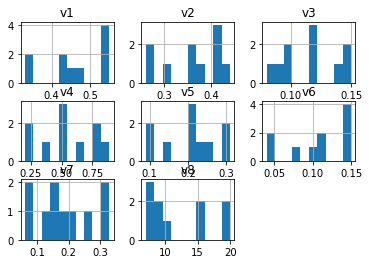

In [23]:
data.hist()
plt.show()

# Density plots

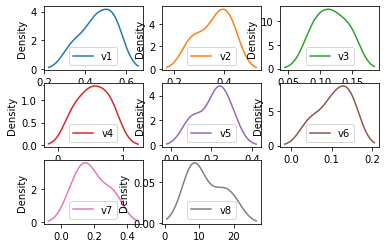

In [25]:
data.plot(kind = 'density', subplots = True, layout = (3,3) , sharex = False)
plt.show()

# Bow-plot

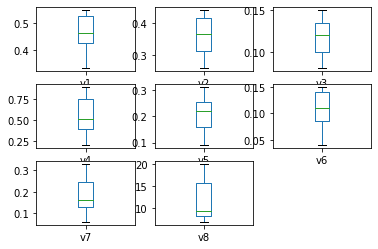

In [27]:
data.plot(kind='box', subplots = True, layout=(3,3), sharex = False, sharey = False)
plt.show()

# Correlation matrix plot

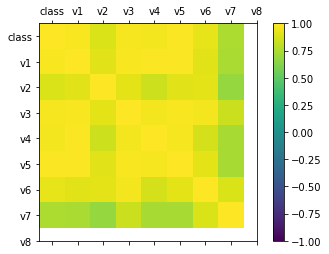

In [39]:
import numpy as np

#calculate pearson's correlation coefficients (revisited)
correlations = data.corr(method = 'pearson')

#Plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = list(data.columns.values) #data의 변수명을 받아 list로 저장
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# Scatter plot matrix

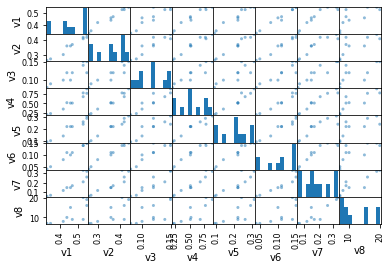

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()